# Practice with pandas

Load a dataset of your choice from  https://github.com/fivethirtyeight/data which we neither used in class nor in the group exercise by using 

In [108]:
import pandas as pd
import numpy as np

df = pd.read_csv('airline-safety.csv')

(you might have to choose the raw format).
Use the summary command to describe your data. Use at least five further built-in commands from numpy or pandas to obtain information about your data and give a short summary of your findings. 

In [109]:
# your code
from __future__ import division

# Get a summary of the data
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [107]:
# Count total fatalities
print("\nTotal fatalities 1985-1999: %d" % df.fatalities_85_99.sum())
print("\nTotal fatalities 2000-2014: %d" % df.fatalities_00_14.sum())


Total fatalities 1985-1999: 6295

Total fatalities 2000-2014: 3109


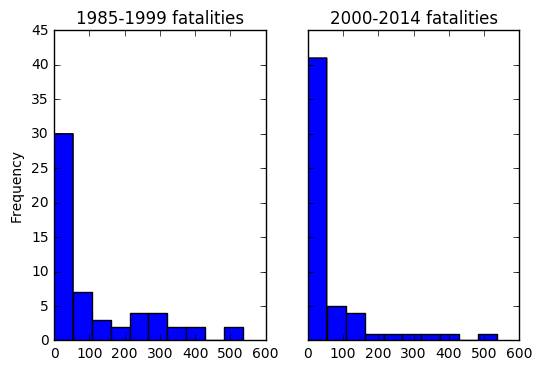

In [105]:
# Compare overall fatalities
import matplotlib.pyplot as plt
%matplotlib inline
f, axes = plt.subplots(1,2,sharey=True)
df.fatalities_85_99.plot(kind="hist",ax=axes[0],title="1985-1999 fatalities")
df.fatalities_00_14.plot(kind="hist",ax=axes[1],title="2000-2014 fatalities")
plt.show()

In [90]:
# Check which companies are in top 10 most fatalities 
print "\nAirlines with most fatalities betwen 1985 and 1999"
fat_85_99 = df.sort_values(by="fatalities_85_99",ascending=False)[0:11][["airline","fatalities_85_99","incidents_85_99"]]
print(fat_85_99)

print "\nAirlines with most fatalities betwen 2000 and 2014"
fat_00_14 = df.sort_values(by="fatalities_00_14",ascending=False)[0:11][["airline","fatalities_00_14","incidents_00_14"]]
print(fat_00_14)


Airlines with most fatalities betwen 1985 and 1999
                  airline  fatalities_85_99  incidents_85_99
16         China Airlines               535               12
28         Japan Airlines               520                3
31             Korean Air               425               12
19     Delta / Northwest*               407               24
6              Air India*               329                2
13                Avianca               323                5
51  United / Continental*               319               19
40          Saudi Arabian               313                7
49           Thai Airways               308                8
20               Egyptair               282                8
24       Garuda Indonesia               260               10

Airlines with most fatalities betwen 2000 and 2014
                  airline  fatalities_00_14  incidents_00_14
34      Malaysia Airlines               537                3
11              American*               41

In [91]:
# Check which companies where in top 10 most fatalities in the two periods
most_fat = fat_85_99["airline"].append(fat_00_14["airline"])
most_fat = most_fat.value_counts()
print("\nAirlines that ranked in top 10 most fatalities in the two periods")
print(most_fat[most_fat == 2])


Airlines that ranked in top 10 most fatalities in the two periods
Air India*               2
China Airlines           2
United / Continental*    2
Name: airline, dtype: int64


In [100]:
# Check number of incidents proportionally to the number of seat kilometer flow each week
inc_per_seat_Mkm_85_99 = [df.incidents_85_99[i]*10**9/df.avail_seat_km_per_week[i] for i in range(0,len(df.avail_seat_km_per_week))]
df['inc_per_seat_Mkm_85_99'] = inc_per_seat_Mkm_85_99
inc_per_seat_Mkm_00_14 = [df.incidents_00_14[i]*10**9/df.avail_seat_km_per_week[i] for i in range(0,len(df.avail_seat_km_per_week))]
df['inc_per_seat_Mkm_00_14'] = inc_per_seat_Mkm_00_14
inc_85_99 = df.sort_values(by='inc_per_seat_Mkm_85_99',ascending=False)
print("\nAirlines with most incidents per seat million kilometer per week 1985-1999")
print(inc_85_99[['airline','inc_per_seat_Mkm_85_99']][0:10])
inc_00_14 = df.sort_values(by='inc_per_seat_Mkm_00_14',ascending=False)
print("\nAirlines with most incidents per seat million kilometer per week 2000-2014")
print(inc_00_14[['airline','inc_per_seat_Mkm_00_14']][0:10])



Airlines with most incidents per seat million kilometer per week 1985-1999
                   airline  inc_per_seat_Mkm_85_99
1                Aeroflot*               63.456422
22      Ethiopian Airlines               51.170720
35  Pakistan International               22.951366
55         Xiamen Airlines               20.907722
36     Philippine Airlines               16.948859
38         Royal Air Maroc               16.908724
24        Garuda Indonesia               16.303728
2    Aerolineas Argentinas               15.551952
16          China Airlines               14.756218
20                Egyptair               14.344633

Airlines with most incidents per seat million kilometer per week 2000-2014
                   airline  inc_per_seat_Mkm_00_14
35  Pakistan International               28.689207
40           Saudi Arabian               12.795550
44   Sri Lankan / AirLanka               12.285655
22      Ethiopian Airlines               10.234144
38         Royal Air Maroc      

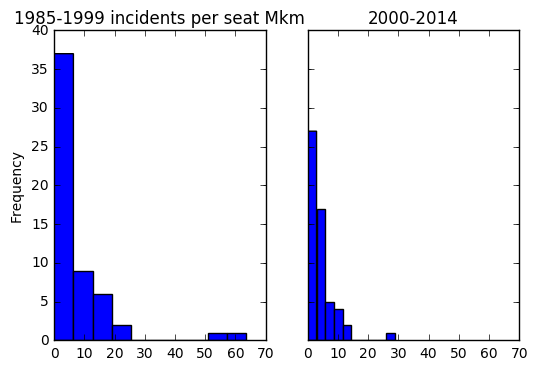

In [111]:
f, axes = plt.subplots(1,2,sharey=True,sharex=True)
inc_85_99['inc_per_seat_Mkm_85_99'].plot(kind="hist",ax=axes[0],title="1985-1999 incidents per seat Mkm")
inc_00_14['inc_per_seat_Mkm_00_14'].plot(kind="hist",ax=axes[1],title="2000-2014")
plt.show()

### Summary
#### Overall fatalities
The total number of fatalities linked to air accidents has been divided by two when comparing the period 1985-1999 and the period 2000-2014, declining from 6000+ to roughly 3000. This means that overall air trips have become more secure, especially if taking into account that the number of seat km over that period has increased significantly in 15 years.

Looking at the repartition of fatalities, it is to be noted that in the first period observed, there used to be many more accidents with 150 or more fatalities than in the second period. However on the second period there are more accidents with less than 150 fatalities.
This means that overall when accidents happen, they tend to kill less people in the recent period than during the period 1985-1999.

#### Which airlines kill most
Clearly over the period 1985-1999 the Asian airlines were the most dangerous, with 7 of them ranked in the top 10 of airlines with most fatalities.
This is no longer the case over the period 2000-2014 where airlines from all continents are present in the top 10 (3 of them are Asian)

3 companies make it to the top 10 during the 2 periods:
* Air India
* China Airlines
* United / Continental

#### Highest number of incidents per seat km flown
It is interesting to look at how many incidents occured for each airline in proportion of the number of seat Mkm flown, as it is more representative of the real risks.

_Note: the data doesn't provide differentiated number of seat km flown for the two period, only one figure is provided. My assumption is that this number has significantly grown from the earlier period to the later, hence the figures provided might not be accurate._

In 1985-1999, two companies clearly stand out with extremly high number of incidents: Aeroflot (Russian) and Ethipian airlines. Pakistan Airlines comes third.

In 2000-2014, one company stands out and it is Pakistan Airlines.

Looking at the overall trend over the two periods, the number of incidents per seat km flown has greatly reduced